In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import S_driver_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh, d2d_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [5]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 2 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 1 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.18
params.d2d.B_Marketing = 0.02
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 5
params.d2d.ini_att = 0.01
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000
params.nV = 200
params.nD = 400
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [6]:
# The market share of PT & RW will decrease because in logit model increased number of 
# choices brings utility. 

In [8]:
sim = MaaSSim.simulators.simulate(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

This simulation uses albatros data
28-12-22 10:49:00-WARNING-Setting up 4h simulation at 2022-12-28 08:48:39 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands
Day =  0
28-12-22 10:49:07-WARNING-simulation time 2.6 s
Day =  1
28-12-22 10:49:15-WARNING-simulation time 2.7 s
Day =  2
28-12-22 10:49:22-WARNING-simulation time 2.7 s
Day =  3
28-12-22 10:49:30-WARNING-simulation time 2.7 s
Day =  4
28-12-22 10:49:37-WARNING-simulation time 2.7 s
Day =  5
28-12-22 10:49:45-WARNING-simulation time 2.8 s
Day =  6
28-12-22 10:49:53-WARNING-simulation time 2.7 s
Day =  7
28-12-22 10:50:00-WARNING-simulation time 2.8 s
Day =  8
28-12-22 10:50:08-WARNING-simulation time 2.7 s
Day =  9
28-12-22 10:50:16-WARNING-simulation time 2.7 s
Day =  10
28-12-22 10:50:23-WARNING-simulation time 2.7 s
Day =  11
28-12-22 10:50:31-WARNING-simulation time 2.7 s
Day =  12
28-12-22 10:50:40-WARNING-simulation time 3.6 s
Day =  13
28-12-22 10:50:48-WARNING-simulation time 2.8 s
Day =  14
28-12-22 10:50:5

In [18]:
df = sim.res[2].veh_exp
df[df.P1_INFORMED==True]

nRIDES  nREJECTED  nDAYS_WORKED  DRIVING_TIME  IDLE_TIME  PICKUP_DIST  \
veh                                                                          
1       0.0        0.0           0.0           0.0        0.0          0.0   
3       0.0        0.0           0.0           0.0        0.0          0.0   
4       0.0        0.0           0.0           0.0        0.0          0.0   
12      0.0        0.0           0.0           0.0        0.0          0.0   
18      0.0        0.0           0.0           0.0        0.0          0.0   
..      ...        ...           ...           ...        ...          ...   
189     0.0        0.0           0.0           0.0        0.0          0.0   
190     0.0        0.0           0.0           0.0        0.0          0.0   
193     0.0        0.0           0.0           0.0        0.0          0.0   
195     0.0        0.0           1.0           0.0        0.0          0.0   
198     0.0        0.0           0.0           0.0        0.0          0.0   

     DRIVING_DIST  REVENUE  COST  COMMISSION  ...  IS_REJECTED_BY_TRAVELLER  \
veh                                           ...                             
1             0.0      0.0   0.0         0.0  ...                       0.0   
3             0.0      0.0   0.0         0.0  ...                       0.0   
4             0.0      0.0   0.0         0.0  ...                       0.0   
12            0.0      0.0   0.0         0.0  ...                       0.0   
18            0.0      0.0   0.0         0.0  ...                       0.0   
..            ...      ...   ...         ...  ...                       ...   
189           0.0      0.0   0.0         0.0  ...                       0.0   
190           0.0      0.0   0.0         0.0  ...                       0.0   
193           0.0      0.0   0.0         0.0  ...                       0.0   
195           0.0      0.0   0.0         0.0  ...                       0.0   
198           0.0      0.0   0.0         0.0  ...                       0.0   

     ARRIVES_AT_PICKUP MEETS_TRAVELLER_AT_PICKUP  DEPARTS_FROM_PICKUP  \
veh                                                                     
1                  0.0                       0.0                  0.0   
3                  0.0                       0.0                  0.0   
4                  0.0                       0.0                  0.0   
12                 0.0                       0.0                  0.0   
18                 0.0                       0.0                  0.0   
..                 ...                       ...                  ...   
189                0.0                       0.0                  0.0   
190                0.0                       0.0                  0.0   
193                0.0                       0.0                  0.0   
195                0.0                       0.0                  0.0   
198                0.0                       0.0                  0.0   

    ARRIVES_AT_DROPOFF CONTINUES_SHIFT  STARTS_REPOSITIONING  REPOSITIONED  \
veh                                                                          
1                  0.0             0.0                   0.0           0.0   
3                  0.0             0.0                   0.0           0.0   
4                  0.0             0.0                   0.0           0.0   
12                 0.0             0.0                   0.0           0.0   
18                 0.0             0.0                   0.0           0.0   
..                 ...             ...                   ...           ...   
189                0.0             0.0                   0.0           0.0   
190                0.0             0.0                   0.0           0.0   
193                0.0             0.0                   0.0           0.0   
195                0.0             0.0                   0.0           0.0   
198                0.0             0.0                   0.0           0.0  

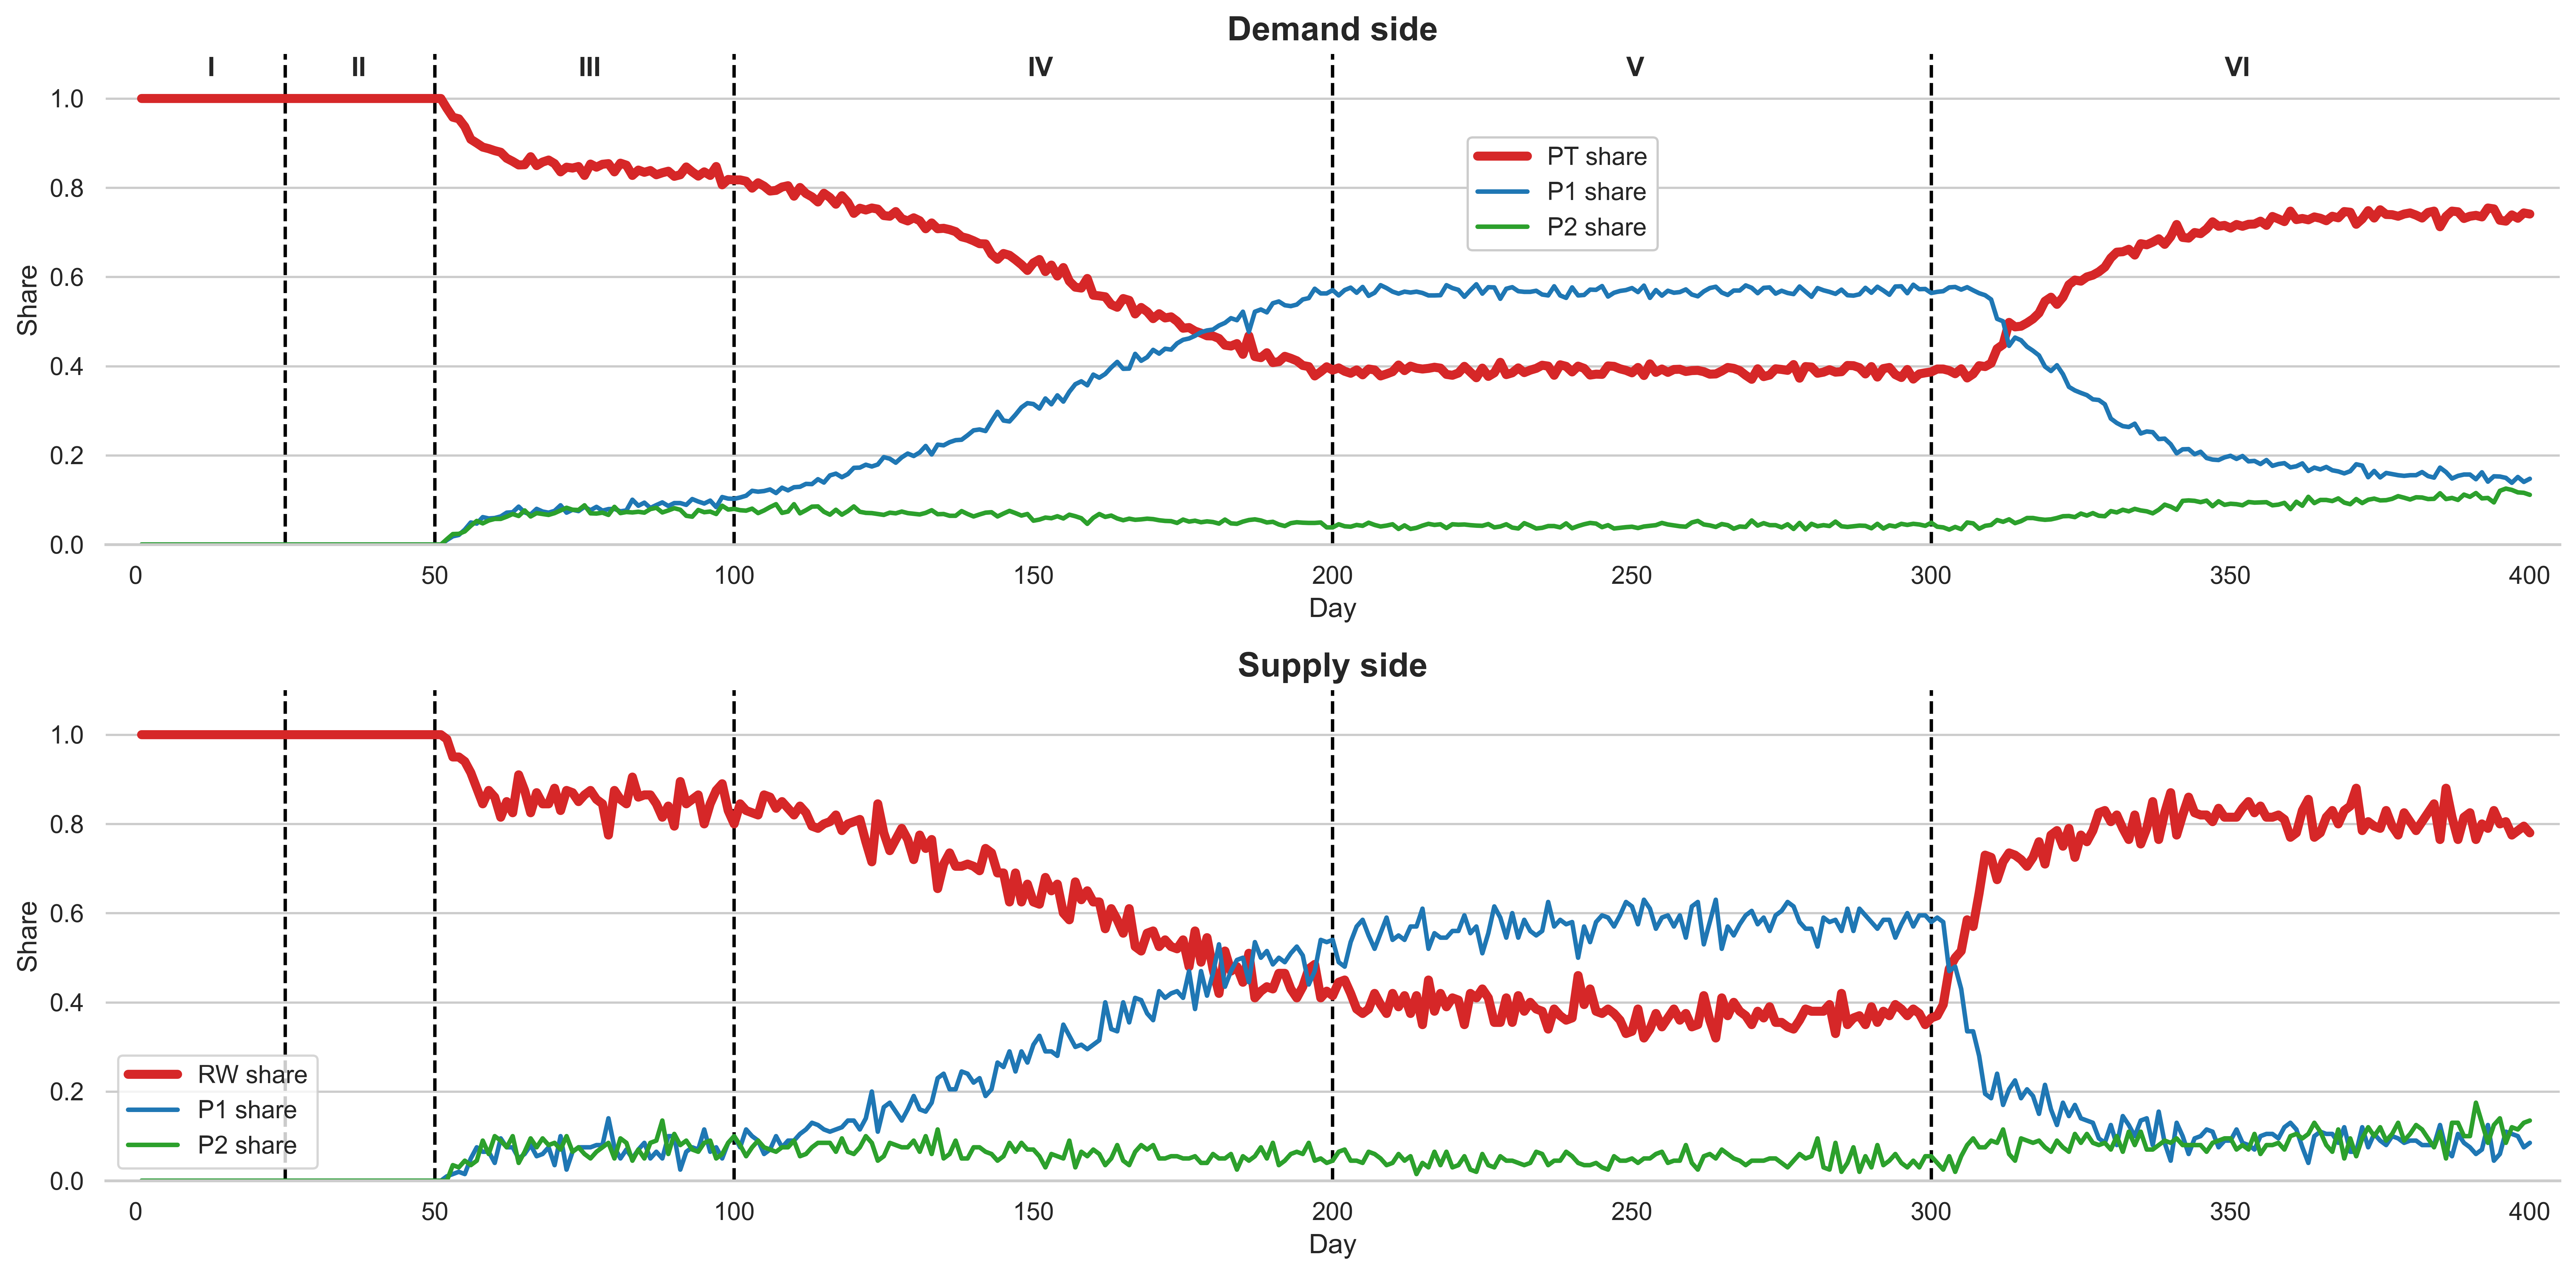

In [9]:
# with S-shaped curve nD=200 nP=2000 nV=200, with increased passenger sensitivity to changes in system
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    ypt= [] ; yp1=[]; yp2 = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            df = sim.res[d].pax_exp
            ypt.append(df.OUT.value_counts().get(True, 0)/params.nP)
            yp1.append(len(df[df.platform_id==1])/params.nP)
            yp2.append(len(df[df.platform_id==2])/params.nP)
        lx = [i for i in range(1,len(ypt)+1)]
        sns.lineplot(x=lx, y=ypt, label = 'PT share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
        sns.lineplot(x=lx, y=yp1, label = 'P1 share', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
        sns.lineplot(x=lx, y=yp2, label = 'P2 share', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            df = sim.res[d].veh_exp
            ypt.append(df.OUT.value_counts().get(True, 0)/params.nV)
            yp1.append(len(df[df.platform_id==1])/params.nV)
            yp2.append(len(df[df.platform_id==2])/params.nV)
        lx = [i for i in range(1,len(ypt)+1)]
        sns.lineplot(x=lx, y=ypt, label = 'RW share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
        sns.lineplot(x=lx, y=yp1, label = 'P1 share', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
        sns.lineplot(x=lx, y=yp2, label = 'P2 share', color='C2', lw=2, ax=ax[ax_n])#, marker='o')

    
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.6))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
# ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [19]:
vs = {}
for v in range(1,params.nV+1):
    p1 = 0; p2=0
    for d in range(0,sim.params.nD):
        if sim.res[d].veh_exp.loc[v].platform_id==1:
            p1 = p1+1
        elif sim.res[d].veh_exp.loc[v].platform_id==2:
            p2 = p2+1
    
    vs[v] = [p1,p2]

In [20]:
vs

{1: [192, 15],
 2: [27, 25],
 3: [64, 29],
 4: [68, 36],
 5: [29, 32],
 6: [124, 51],
 7: [135, 21],
 8: [159, 16],
 9: [142, 19],
 10: [87, 22],
 11: [148, 10],
 12: [147, 25],
 13: [44, 31],
 14: [172, 18],
 15: [39, 27],
 16: [158, 18],
 17: [61, 32],
 18: [141, 21],
 19: [151, 16],
 20: [34, 26],
 21: [126, 17],
 22: [167, 10],
 23: [112, 25],
 24: [148, 16],
 25: [93, 22],
 26: [136, 36],
 27: [52, 50],
 28: [35, 33],
 29: [169, 15],
 30: [145, 21],
 31: [102, 23],
 32: [26, 43],
 33: [171, 14],
 34: [55, 26],
 35: [123, 20],
 36: [133, 46],
 37: [126, 57],
 38: [183, 11],
 39: [158, 17],
 40: [143, 12],
 41: [115, 28],
 42: [45, 26],
 43: [33, 22],
 44: [166, 14],
 45: [154, 18],
 46: [186, 9],
 47: [133, 29],
 48: [30, 22],
 49: [152, 10],
 50: [35, 28],
 51: [169, 17],
 52: [86, 19],
 53: [32, 27],
 54: [128, 17],
 55: [121, 23],
 56: [30, 87],
 57: [166, 11],
 58: [165, 21],
 59: [41, 29],
 60: [166, 21],
 61: [151, 21],
 62: [158, 12],
 63: [89, 15],
 64: [147, 19],
 65: [44,

In [ ]:
pax in p1 = 1030  in p2 = 146
veh in p1 = 81    in p2 = 66

In [34]:
df = sim.res[200].veh_exp
df[df.platform_id==2].ACTUAL_INC.mean()

10.415769696969697

In [24]:
df = sim.res[200].pax_exp
df[df.platform_id==1].ACTUAL_WT.mean()

2.7583333333333315

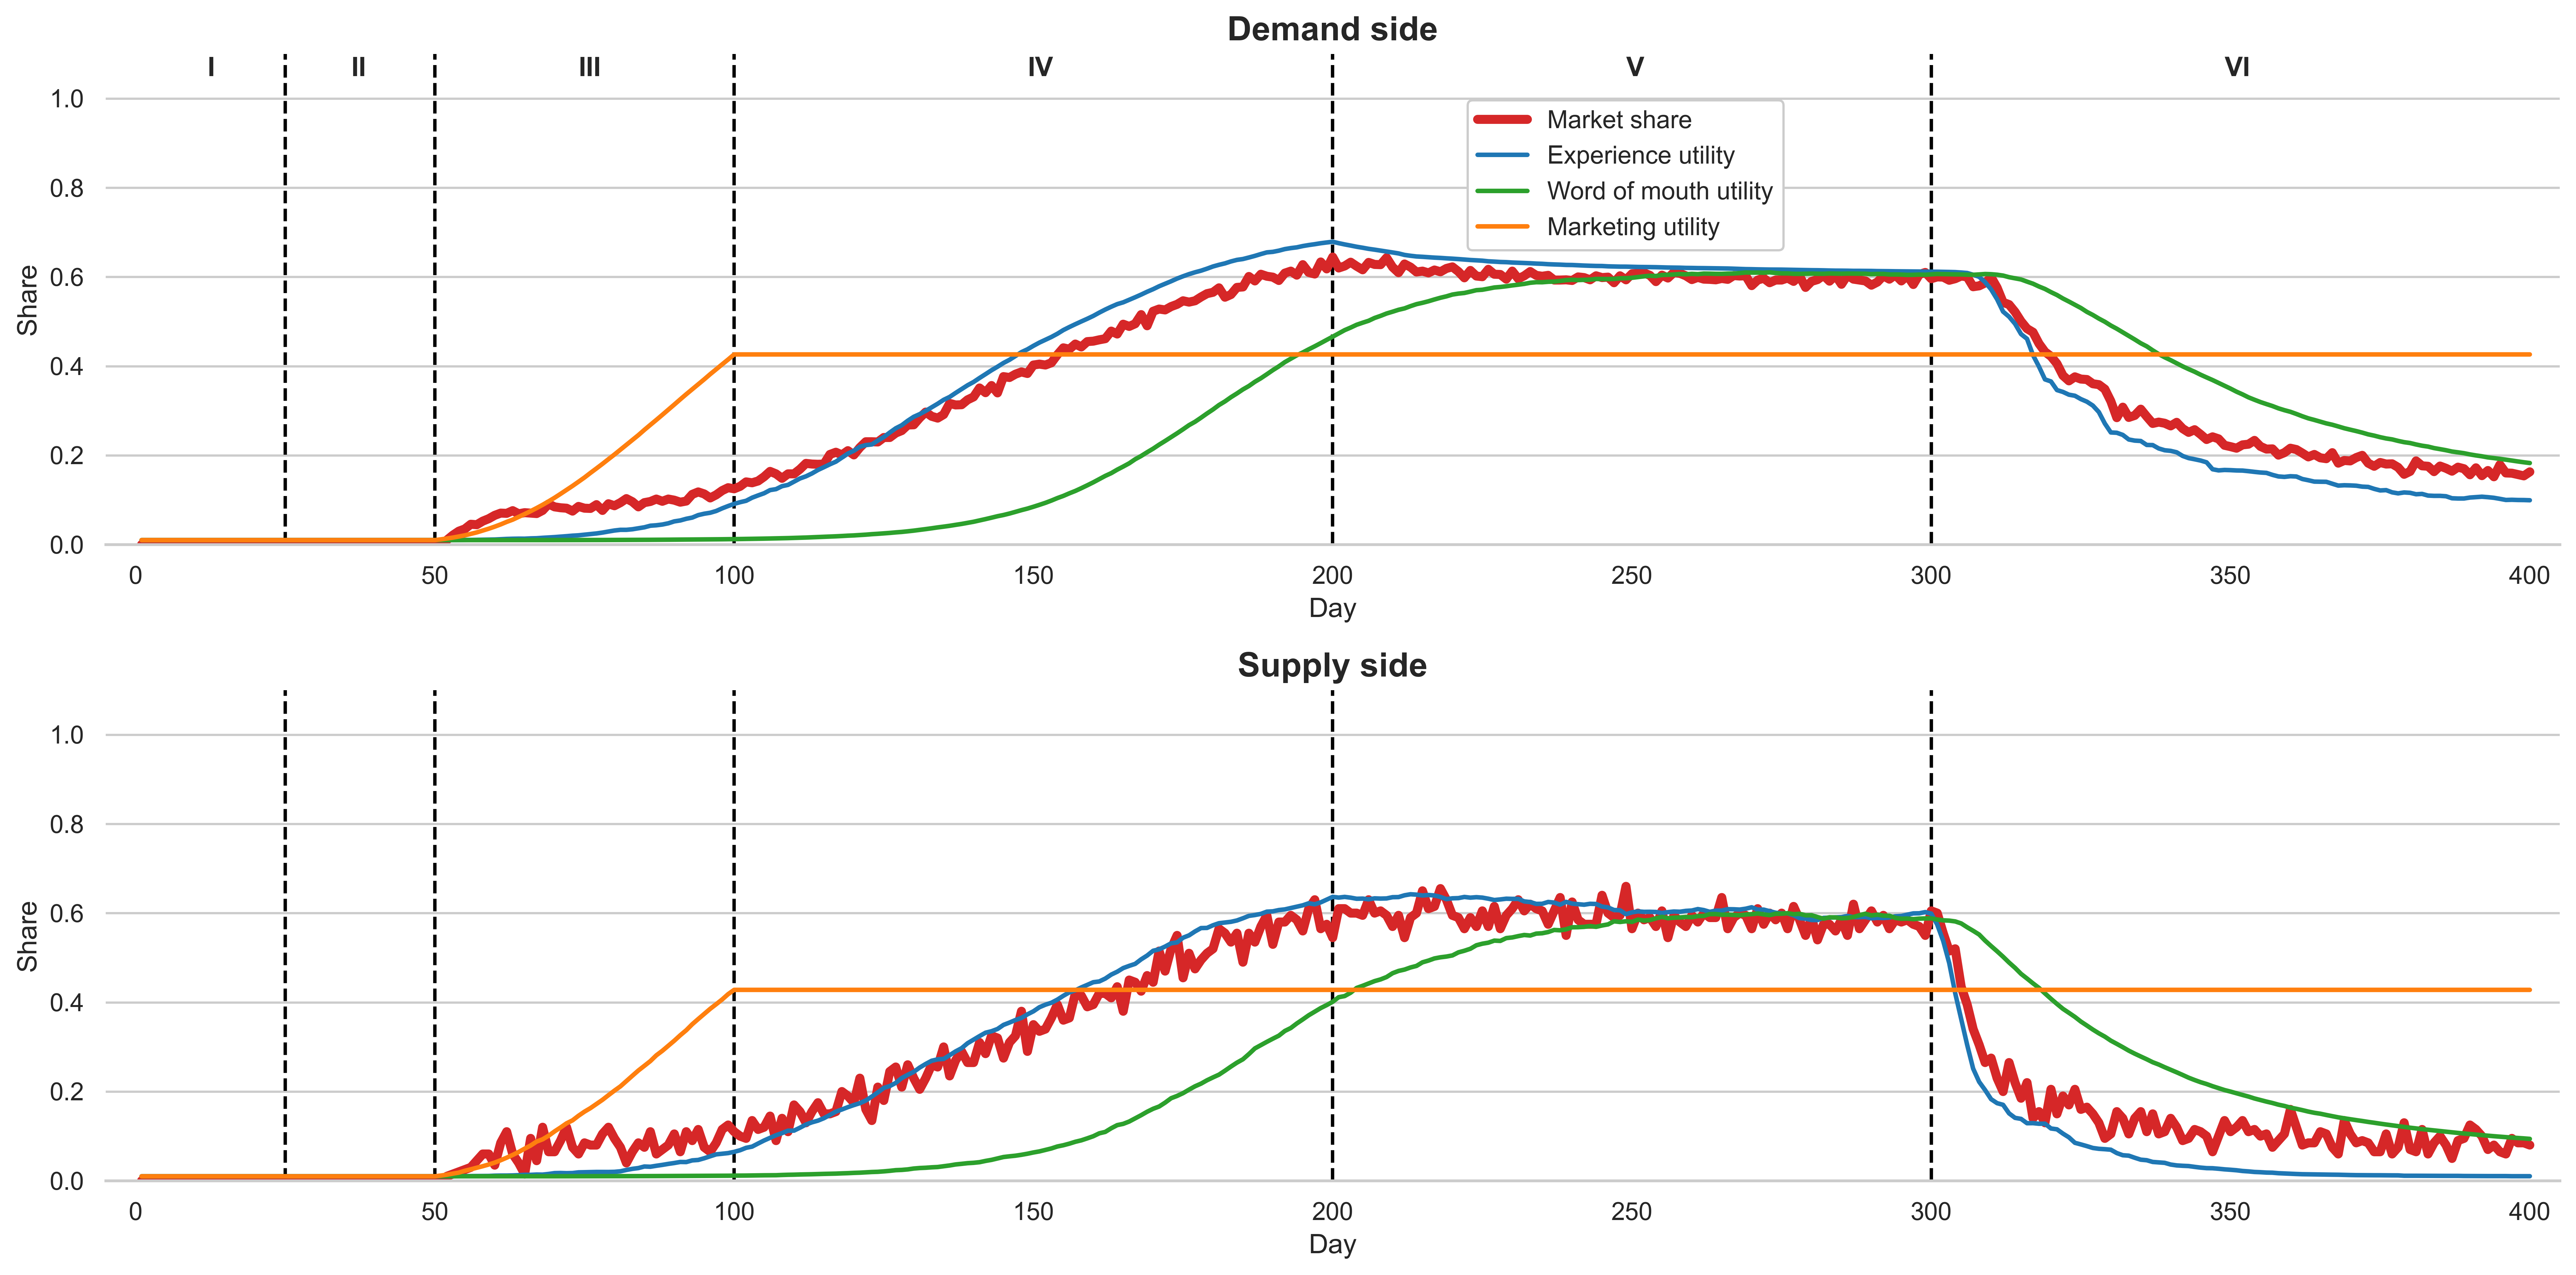

In [8]:
# with S-shaped curve nD=200 nP=2000 nV=200, with increased passenger sensitivity to changes in system
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.6))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [14]:
x=1
sim.res[1].pax_exp['P{}_WOM_U'.format(x)].mean()
sim.res[1].pax_exp['P{}_WOM_U'.format(x)].mean()

0.010000000000000163

KeyError: 'P[]_WOM_U'

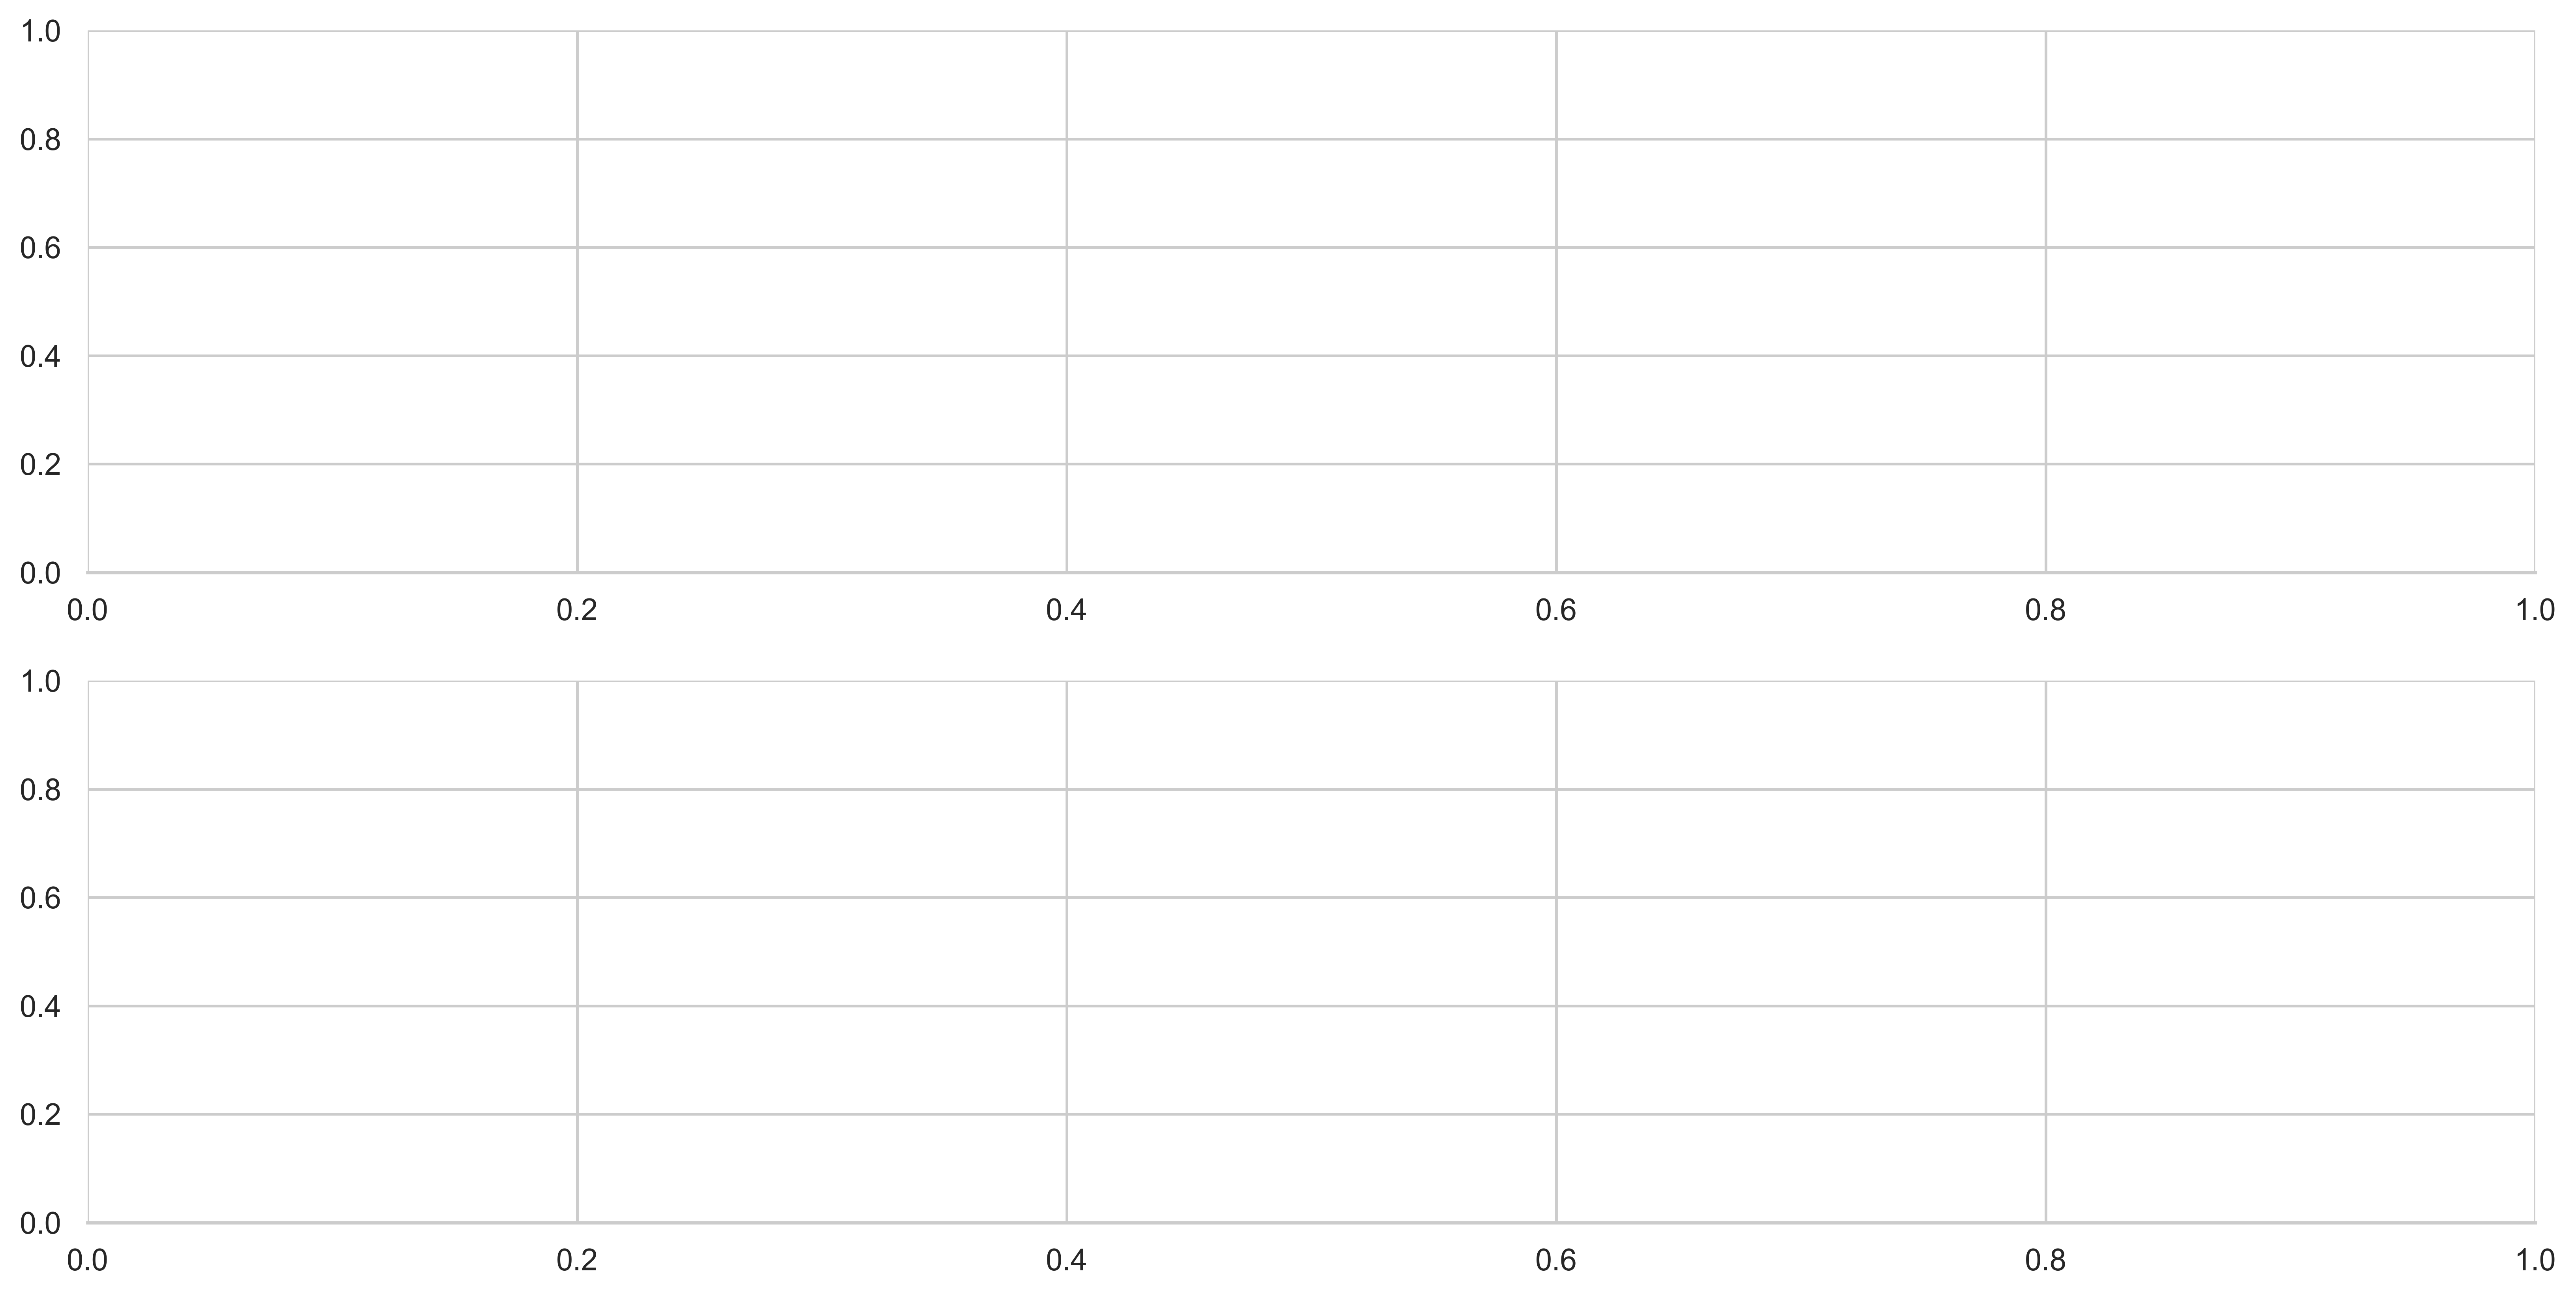

In [11]:
# with S-shaped curve nD=200 nP=2000 nV=200, with increased passenger sensitivity to changes in system
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

x = 1

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp['P{}_WOM_U'.format(x)].mean())
            ym.append(sim.res[d].pax_exp['P{}_MARKETING_U'.format(x)].mean())
            ye.append(sim.res[d].pax_exp['P{}_EXPERIENCE_U'.format(x)].mean())
            yp = sim.res[d].pax_exp[sim.res[d].pax_exp.platform_id==x]
            yms.append(yp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp['P{}_WOM_U'.format(x)].mean())
            ym.append(sim.res[d].veh_exp['P{}_MARKETING_U'.format(x)].mean())
            ye.append(sim.res[d].veh_exp['P{}_EXPERIENCE_U'.format(x)].mean())
            yp = sim.res[d].veh_exp[sim.res[d].veh_exp.platform_id==x]
            yms.append(yp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.6))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

<AxesSubplot:>

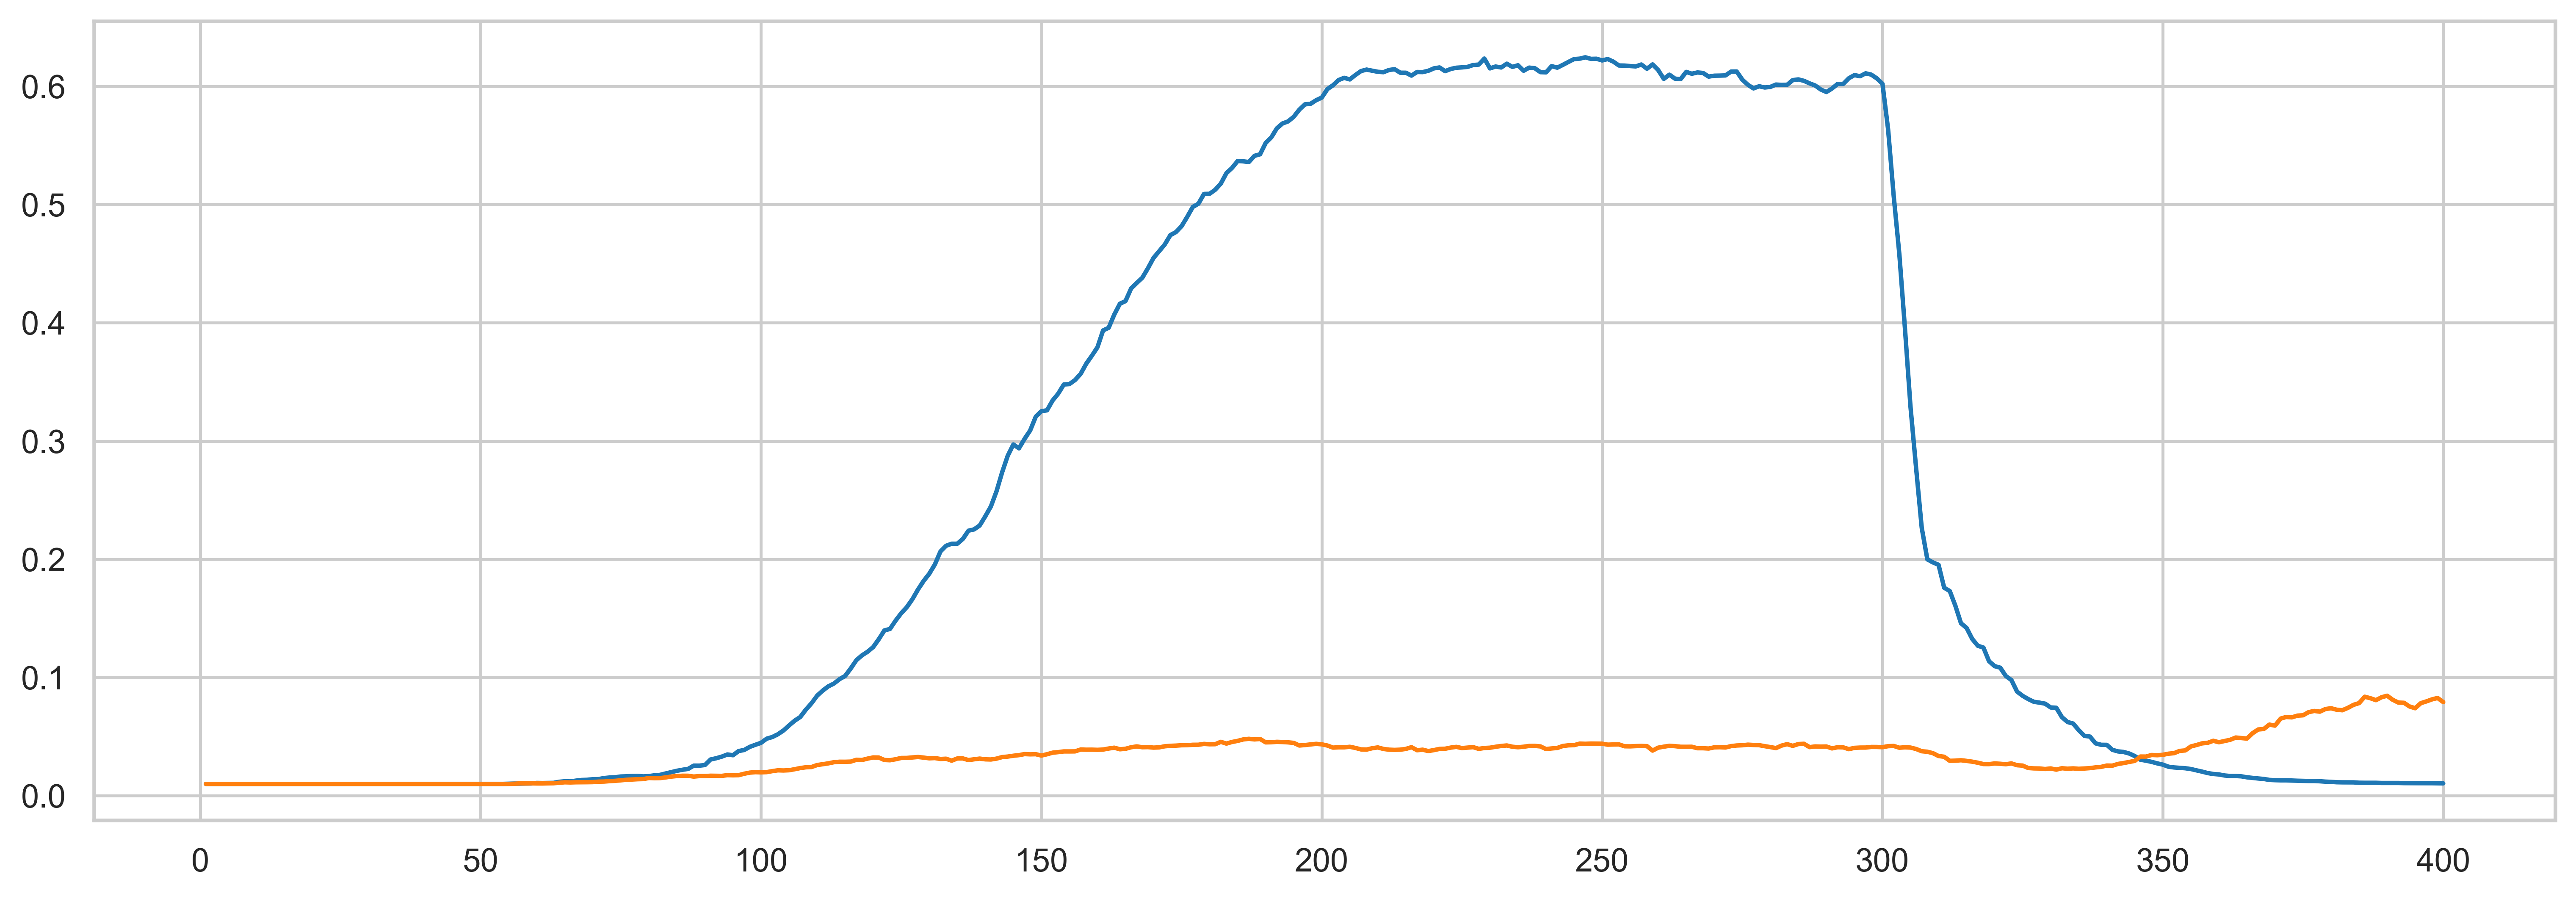

In [15]:
fig, ax = plt.subplots(figsize=(15,5))

ye_p1 = []
ye_p2 = []
x = 'veh'

for d in range(0,sim.params.nD):
    ye_p1.append(sim.res[d]['{}_exp'.format(x)].P1_EXPERIENCE_U.mean())
    ye_p2.append(sim.res[d]['{}_exp'.format(x)].P2_EXPERIENCE_U.mean())
    
    # ye_p1.append(sim.res[d]['{}_exp'.format(x)].P1_WOM_U.mean())
    # ye_p2.append(sim.res[d]['{}_exp'.format(x)].P2_WOM_U.mean())
    
    # ye_p1.append(sim.res[d]['{}_exp'.format(x)].P1_MARKETING_U.mean())
    # ye_p2.append(sim.res[d]['{}_exp'.format(x)].P2_MARKETING_U.mean())
        
x = [i for i in range(1,len(ye_p1)+1)]

sns.lineplot(x=x, y=ye_p1)
sns.lineplot(x=x, y=ye_p2)

In [17]:
def smooth(y,w=11,o=1,d=51):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,51)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

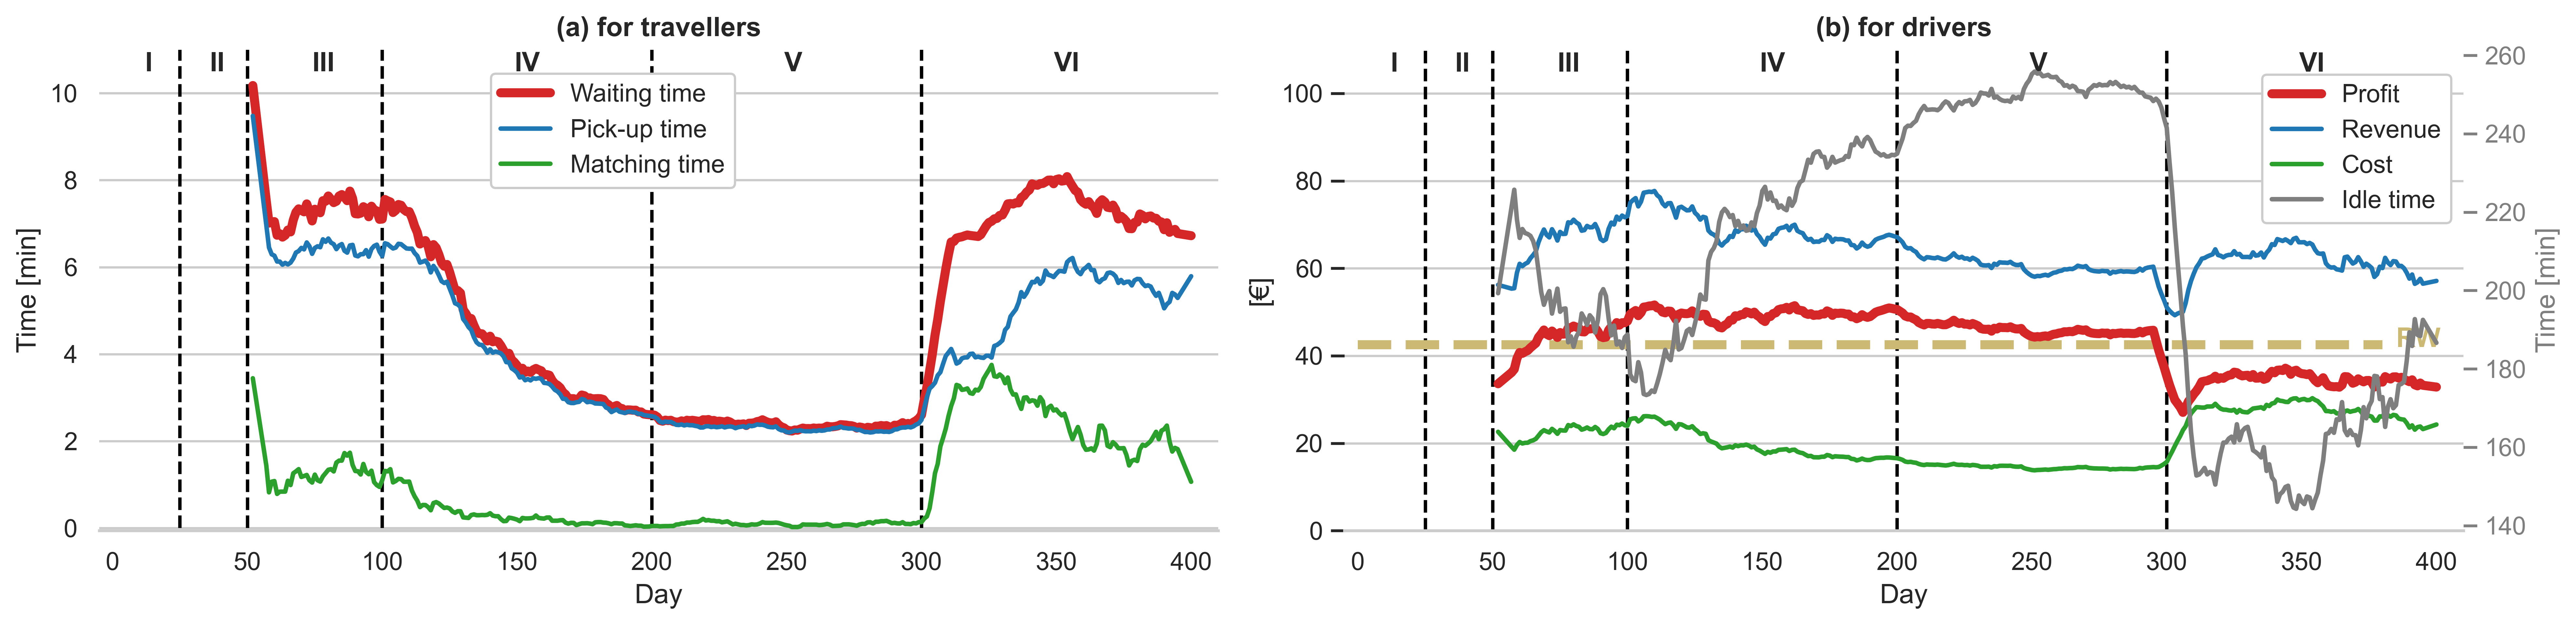

In [18]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(ncols=2, figsize=(16,4))
sns.despine(left=True)
    

x = []
yw = []
yp = []
yi = []
ym = []
yr = []
yprof = []
yc = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    yw.append(df[df.OUT==False].ACTUAL_WT.mean()) # Waiting time per passenger
    ym.append(df[df.OUT==False].MATCHING_T.mean()) # Matching time per passenger
    # yprof.append(df.plat_profit.sum())
    
    df = sim.res[d].veh_exp
    yp.append(df[df.OUT==False].ARRIVES_AT_PICKUP.mean()/(df[df.OUT==False].nRIDES.mean()*60))
    yi.append(df[df.OUT==False].IDLE_TIME.mean()/60)
    yr.append(df[df.OUT==False].REVENUE.mean())
    yprof.append(df[df.OUT==False].ACTUAL_INC.mean())
    yc.append(df[df.OUT==False].COST.mean())



yw = smooth(yw)
ym = smooth(ym)
yp = smooth(yp)
yi = smooth(yi)
yr = smooth(yr)
yprof = smooth(yprof)
yc = smooth(yc)

x = [i for i in range(1,len(yp)+1)]
sns.lineplot(x=x, y=yw, label = 'Waiting time', color='C3',lw=4, ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=yp, label = 'Pick-up time', color='C0',lw=2, ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=ym, label = 'Matching time', color='C2',lw=2, ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=yprof, label = 'Profit', color='C3',lw=4, ax=ax[1])#, marker='o')
sns.lineplot(x=x, y=yr, label = 'Revenue', color='C0',lw=2, ax=ax[1])#, marker='o')
sns.lineplot(x=x, y=yc, label = 'Cost', color='C2',lw=2, ax=ax[1])#, marker='o')ax.twinx()
ax11 = ax[1].twinx()
sns.lineplot(x=x, y=yi, label = 'Idle time', color='C7',lw=2, ax=ax11)#, marker='o')
ax11.set(ylabel='Time [min]')
ax11.grid(b=None)

lines, labels = ax[1].get_legend_handles_labels()
lines2, labels2 = ax11.get_legend_handles_labels()
ax[1].legend(lines + lines2, labels + labels2,framealpha=1, loc=(0.82,0.64))
ax11.legend().remove()
# ax11.spines['right'].set_color('C7')
ax11.tick_params(axis='y', colors='C7')
ax11.yaxis.label.set_color('C7')

for i in [0,1]:
    ax[i].grid(axis='x')

ax[0].vlines([25, 50, 100, 200, 300], 0, 11, linestyles='dashed', colors='black')
ax[1].vlines([25, 50, 100, 200, 300], 0, 110, linestyles='dashed', colors='black')
ax[1].hlines([params.d2d.res_wage], 0, 380, linestyles='dashed', colors='y', lw=4)
ax[1].annotate('RW', xy =(385,42), fontweight='bold', color='y')

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,10.5),(36,10.5),(74,10.5),(149,10.5),(249,10.5),(349,10.5)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')
for i in range(0,6):
    coords = [(12,105),(36,105),(74,105),(149,105),(249,105),(349,105)]
    ax[1].annotate(value[i], xy =coords[i], fontweight='bold')    
    
ax[0].set(xlabel='Day', ylabel='Time [min]', ylim=(-0.06,11), xlim=(-5,410)); ax[1].set(xlabel='Day', ylabel='[€]', ylim=(0,110),xlim=(-5,410))
ax[0].legend(loc=(0.35,0.713),framealpha=1)
sns.despine(left=True)

ax[0].set_title('(a) for travellers',fontweight='bold')
ax[1].set_title('(b) for drivers',fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig3.png')

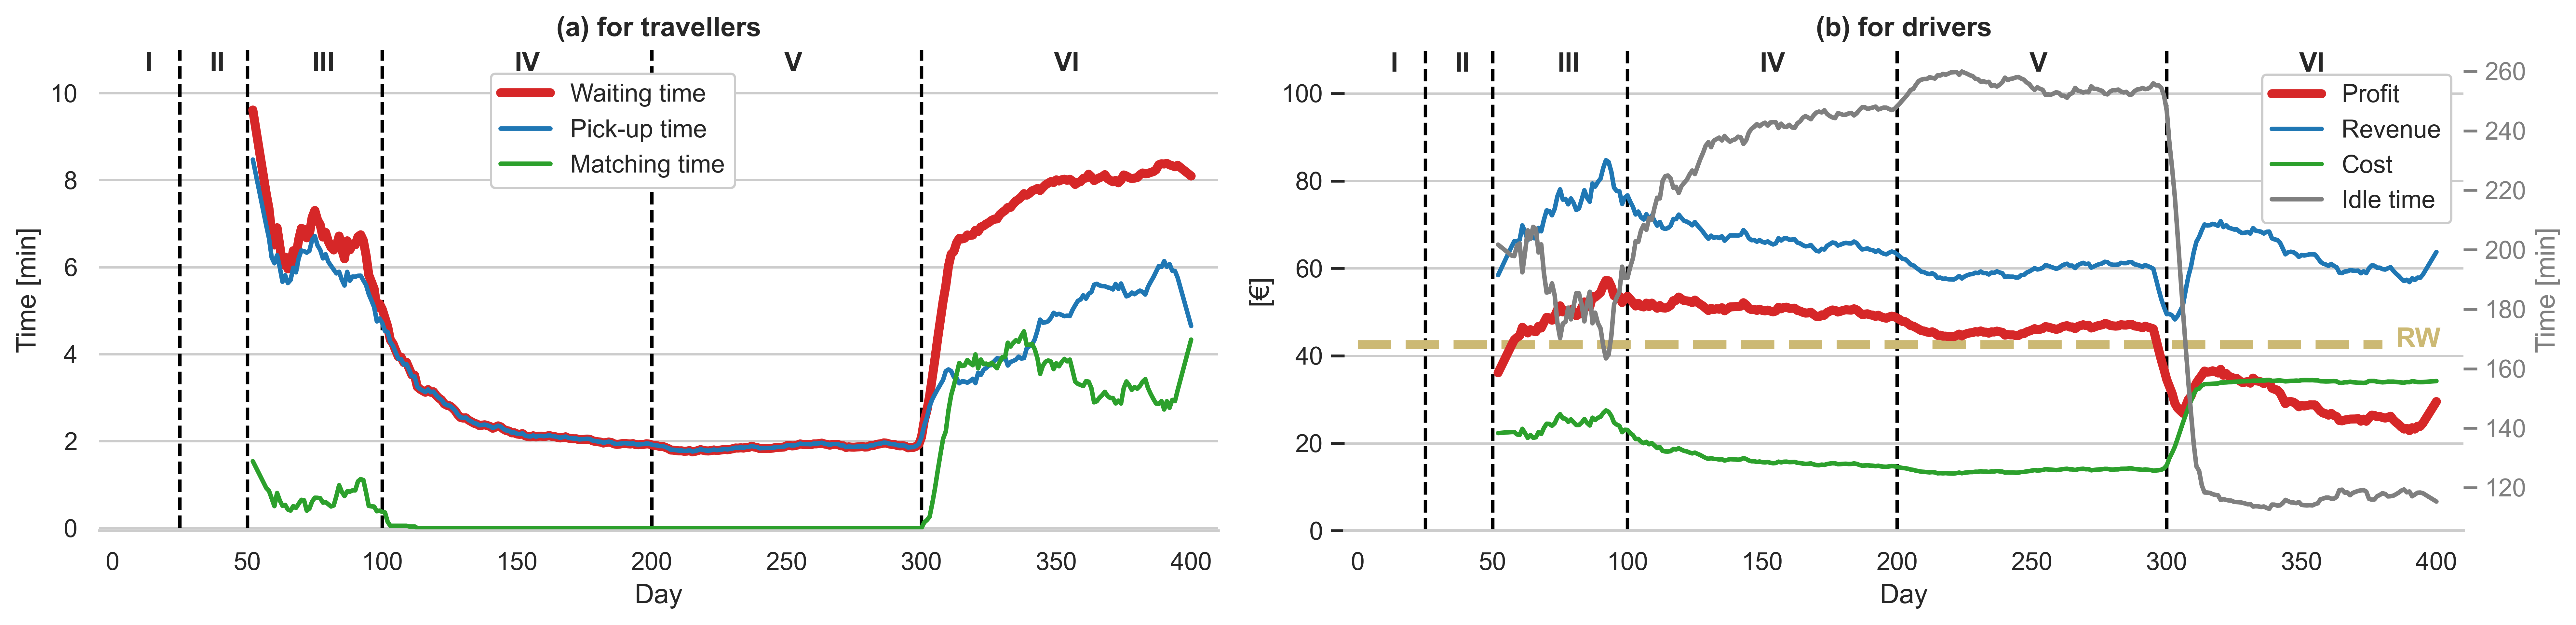

In [4]:
a = True
if a==False:
    print('hi')

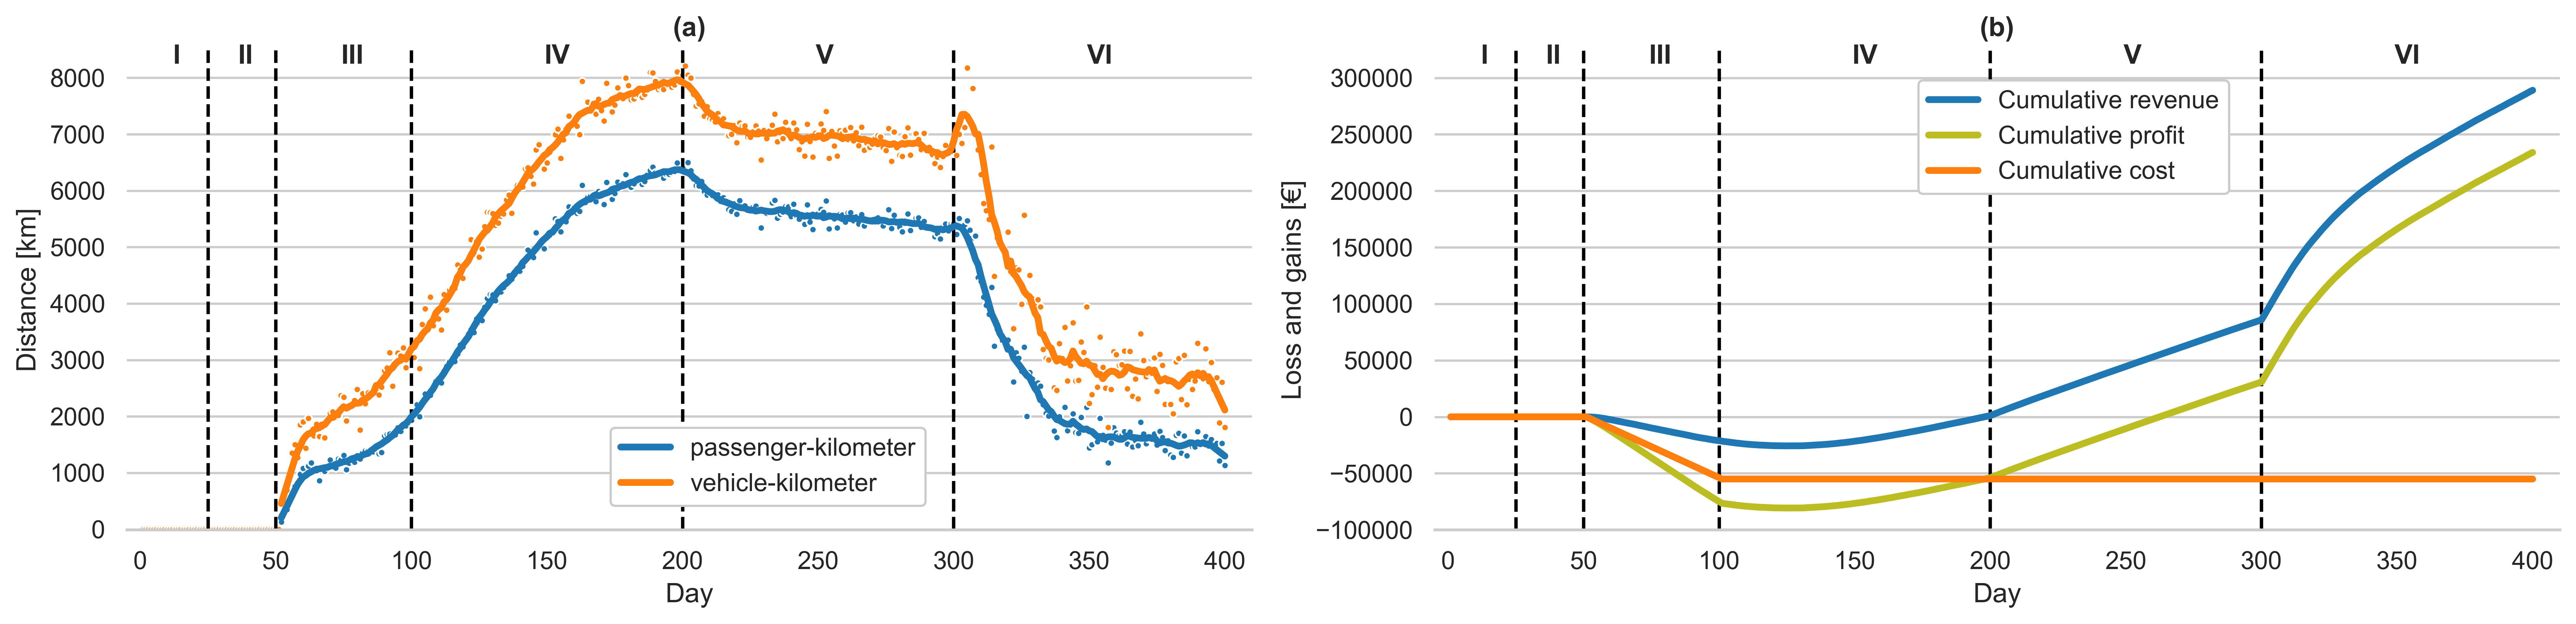

In [11]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(ncols=2,figsize=(16,4))
sns.despine(left=True)

x = []
ypkm = []
yvkm = []

for d in range(0,sim.params.nD):
    df = sim.res[d].veh_exp
    df['pkm'] = df.DRIVING_DIST-df.PICKUP_DIST
    ypkm.append(df.pkm.sum())
    yvkm.append(df.DRIVING_DIST.sum())

x = [i for i in range(1,len(ypkm)+1)]

ypkms = smooth(ypkm)
yvkms = smooth(yvkm)
sns.lineplot(x=x, y=ypkms, lw=3, label = 'passenger-kilometer', ax=ax[0])#, marker='o')
sns.lineplot(x=x, y=yvkms, lw=3, label = 'vehicle-kilometer', color='C1', ax=ax[0])#, marker='o')
lines, labels = ax[0].get_legend_handles_labels()

sns.scatterplot(x=x, y=ypkm, s=10,label = 'passenger-kilometer',ax=ax[0])#, marker='o')
sns.scatterplot(x=x, y=yvkm, s=10,label = 'vehicle-kilometer', color='C1',ax=ax[0])#, marker='o')

ax[0].set(ylim=(-10,8500), xlim=(-5,410), xlabel='Day', ylabel='Distance [km]')
ax[0].legend(lines, labels ,framealpha=1, loc=(0.43,0.05))
ax[0].grid(axis='x')
ax[0].vlines([25, 50, 100, 200, 300], 0, 8500, linestyles='dashed', colors='black')

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,8250),(36,8250),(74,8250),(149,8250),(249,8250),(349,8250)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')
#-----------------------------------------------------------------------------------
x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0',ax=ax[1])#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8',ax=ax[1])#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1',ax=ax[1])#, marker='o')

ax[1].grid(axis='x')
ax[1].vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax[1].set(xlim=(-5,410), ylim=(-100000,325000), xlabel='Day', ylabel='Loss and gains [€]')
ax[1].legend(framealpha=1, loc=(0.43,0.7))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax[1].annotate(value[i], xy =coords[i], fontweight='bold')
    

ax[0].set_title('(a)',fontweight='bold')
ax[1].set_title('(b)',fontweight='bold')


plt.tight_layout()
plt.savefig('Fig4.png')

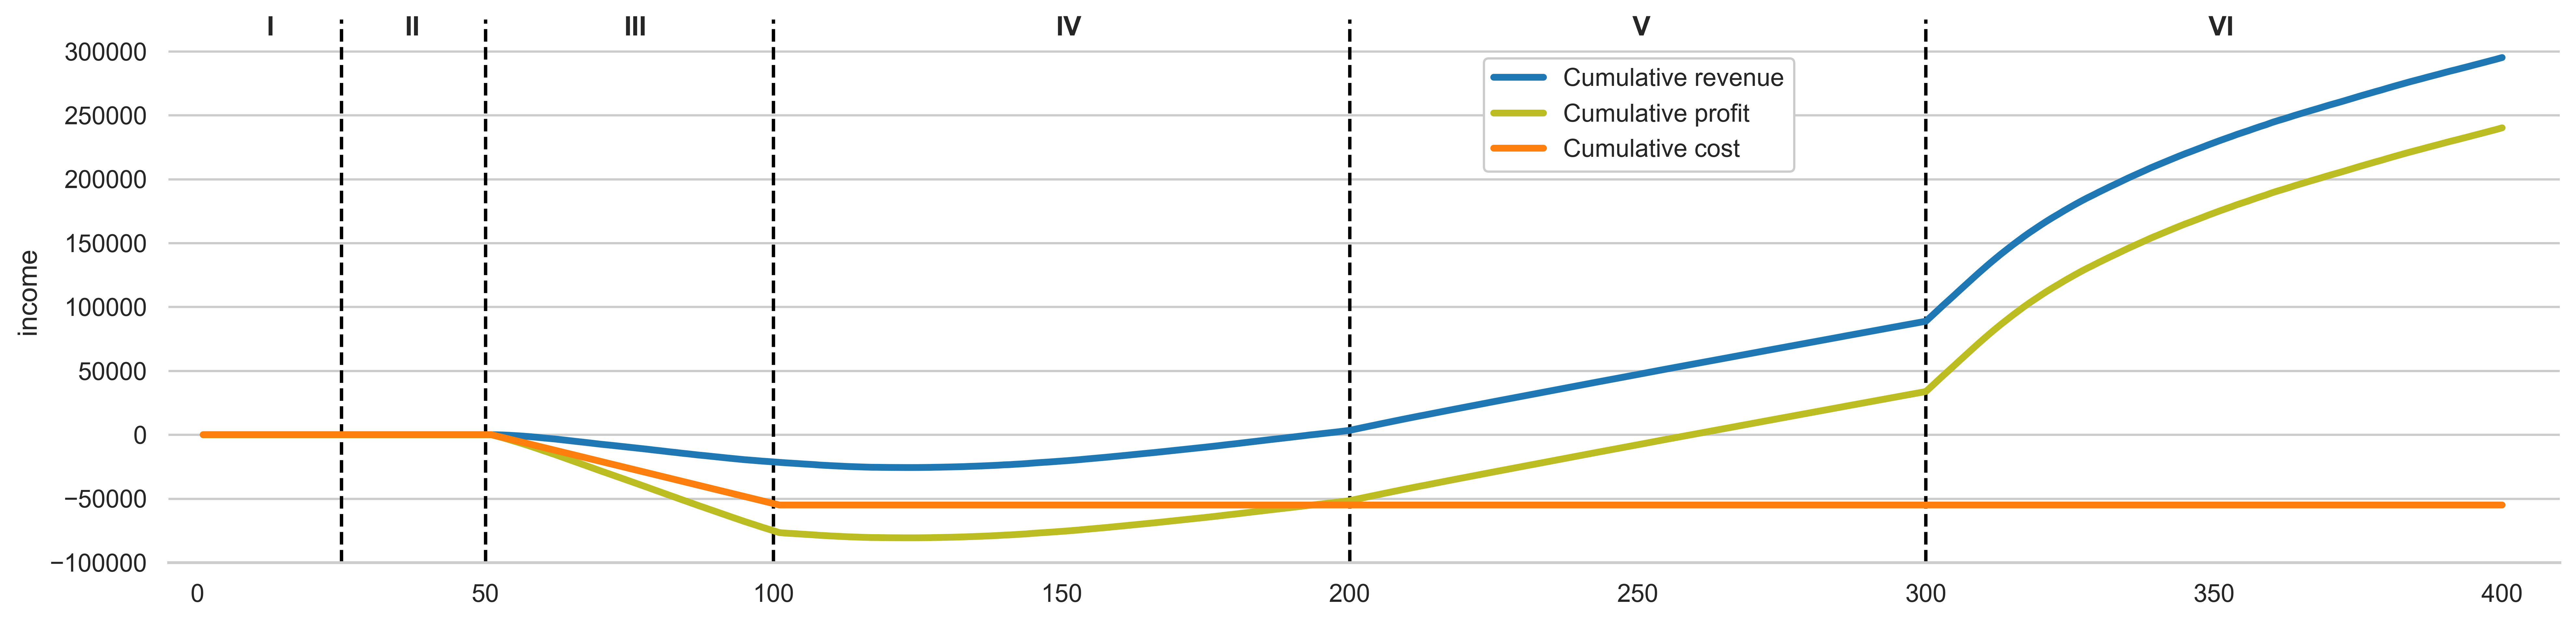

In [177]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')